In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
critics = {

    '레드벨벳': {

        '택시운전사': 2.5,

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '넘버3': 3.5,

        '사랑과전쟁': 2.5,

        '세계대전': 3.0,

    },

    'BTS': {

        '택시운전사': 1.0,

        '겨울왕국': 4.5,

        '리빙라스베가스': 0.5,

        '넘버3': 1.5,

        '사랑과전쟁': 4.5,

        '세계대전': 5.0,

    },

    '블랙핑크': {

        '택시운전사': 3.0,

        '겨울왕국': 3.5,

        '리빙라스베가스': 1.5,

        '넘버3': 5.0,

        '세계대전': 3.0,

        '사랑과전쟁': 3.5,

    },

    '소녀시대': {

        '택시운전사': 2.5,

        '겨울왕국': 3.0,

        '넘버3': 3.5,

        '세계대전': 4.0,

    },

    '마마무': {

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '세계대전': 4.5,

        '넘버3': 4.0,

        '사랑과전쟁': 2.5,

    },

    '오마이걸': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '리빙라스베가스': 2.0,

        '넘버3': 3.0,

        '세계대전': 3.5,

        '사랑과전쟁': 2.0,

    },

    '모모랜드': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '세계대전': 3.0,

        '넘버3': 5.0,

        '사랑과전쟁': 3.5,

    },

    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,

             '넘버3': 4.0},

}

In [5]:
from math import sqrt

In [36]:
def simDistance(data, name1, name2):
    sum=0
    for i in data[name1]:
        if i in data[name2]:
            sum+=pow(data[name1][i]-data[name2][i], 2)
    #print(sqrt(sum)) # 소녀시대와 블랙핑크 유클리디안 거리
    return 1/(sqrt(sum)+1) # 소녀시대와 블랙핑크 유사도
        #print(i)
    #data[name2]
simDistance(critics, '소녀시대', '블랙핑크')

0.3405424265831667

In [29]:
def topMatch(data, name, index=3):
    # 리스트 변수 초기화
    # 소녀시대와 나머지 그룹간 유사도를 모두 구하고 저장(유사도, 이름)한다(리스트)
    # 유사도를 기준으로 정렬(내림차순) -> 이름 출력
    dist=[]
    for i in data:
        #print(i)
        sum=0
        for j in data[i]:
            if j != '소녀시대':
                if j in data['소녀시대']:
                    #print(j)
                    sum+=pow(data['소녀시대'][j]-data[i][j], 2)
        dist.append((1/(sqrt(sum)+1), i))
    dist.sort(reverse=True)
    #print(dist)
    print(dist[1:4])
topMatch(critics, '소녀시대')

[(0.5358983848622454, '마마무'), (0.4721359549995794, '레드벨벳'), (0.43050087404306037, '오마이걸')]


In [42]:
def topMatch(data, name, index=3, simFunc=simDistance):
    res=[]
    for i in data:
        if i!=name:
            res.append((simFunc(data, name, i),i))
    res.sort()
    res.reverse()
    return res[:index]
topMatch(critics, '소녀시대')

[(0.5358983848622454, '마마무'),
 (0.4721359549995794, '레드벨벳'),
 (0.43050087404306037, '오마이걸')]

In [43]:
res=topMatch(critics, '소녀시대')

In [44]:
score=[]
names=[]
for i in res:
    score.append(i[0])
    names.append(i[1])

In [48]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

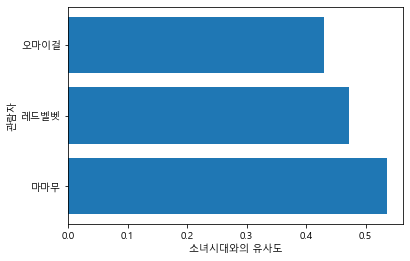

In [52]:
def myBarChart(data, name):
    pos=range(len(data))
    plt.barh(pos, data)
    plt.yticks(pos, name)
    plt.xlabel("소녀시대와의 유사도")
    plt.ylabel("관람자")
    plt.show()
myBarChart(score, names)

(0.0, 5.0, 0.0, 5.0)

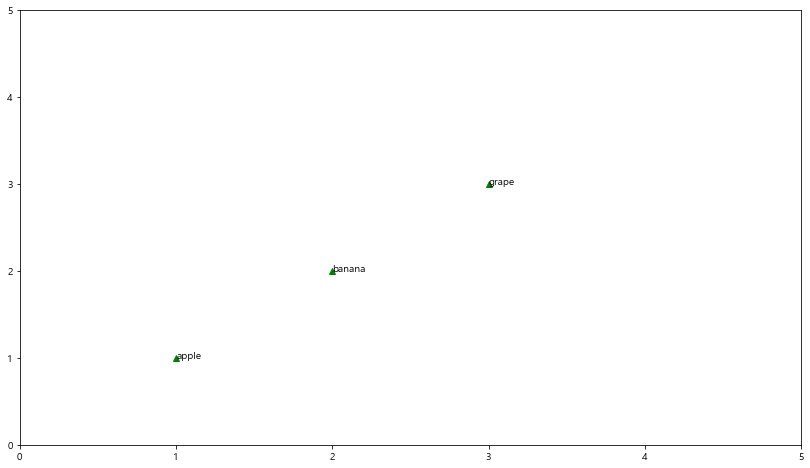

In [59]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3], [1,2,3], 'g^')
plt.text(1,1,'apple')
plt.text(2,2,'banana')
plt.text(3,3,'grape')
plt.axis([0,5,0,5])

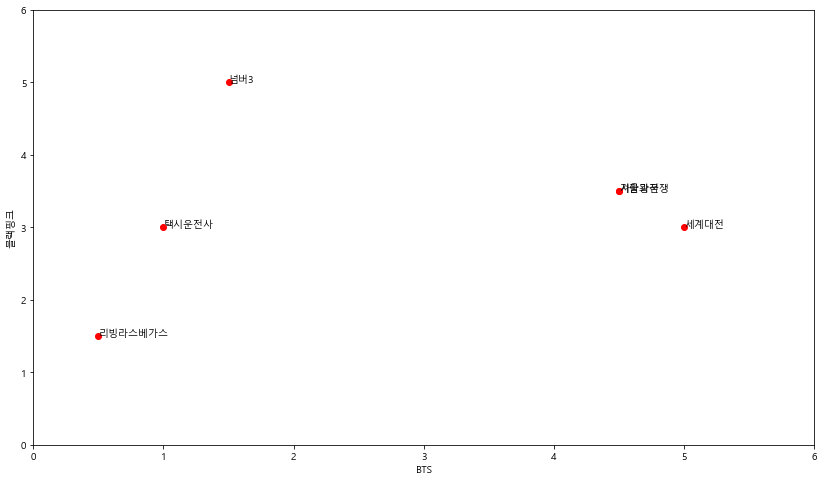

In [67]:
def drawGraph(critics, name1, name2):
    myList1=[]
    myList2=[]
    plt.figure(figsize=(14, 8))
    for i in critics[name1]:
        if i in critics[name2]:
            myList1.append(critics[name1][i])
            myList2.append(critics[name2][i])
            plt.text(critics[name1][i], critics[name2][i], i)
    plt.plot(myList1, myList2, 'ro')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics, 'BTS', '블랙핑크')

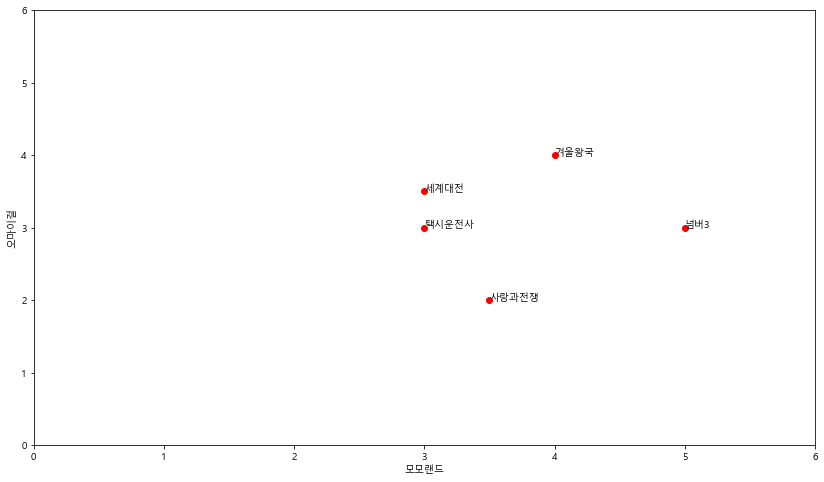

In [68]:
def drawGraph(critics, name1, name2):
    myList1=[]
    myList2=[]
    plt.figure(figsize=(14, 8))
    for i in critics[name1]:
        if i in critics[name2]:
            myList1.append(critics[name1][i])
            myList2.append(critics[name2][i])
            plt.text(critics[name1][i], critics[name2][i], i)
    plt.plot(myList1, myList2, 'ro')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics, '모모랜드', '오마이걸')

In [72]:
def simPearson(data, name1, name2):
    sumX=0
    sumY=0
    sumPowX=0
    sumPowY=0
    sumXY=0
    count=0
    for i in data[name1]:
        if i in data[name2]:
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i], 2)
            sumPowY+=pow(data[name2][i], 2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    r=(sumXY-(sumX*sumY/count))/sqrt((sumPowX-pow(sumX, 2)/count)*(sumPowY-pow(sumY,2)/count))
    return r
print(simPearson(critics, 'BTS', '소녀시대'))

0.5692099788303083
